In [1]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 1.2MB/s 
  Created wheel for PyDrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27435 sha256=faf8b7da2581c699ffa8495af1d88f3c9b89ebed50e118db302610c701ce4749
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [2]:


# https://drive.google.com/open?id=1NkJnve73cEOUHV9SfBFvDvjnJpPCfmgo
fileId = drive.CreateFile({'id': '1y2L_fd_-LNJPSTM5agrynpMgAIdqrCsh'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('orca_pod.zip')  # Save Drive file as a local file

!unzip orca_pod.zip -d ./

pod_classification.zip
Archive:  orca_pod.zip
   creating: ./test/
   creating: ./test/AB25/
  inflating: ./test/AB25/1001_0051_0000.png  
  inflating: ./test/AB25/1002_0000_0000.png  
  inflating: ./test/AB25/1002_0100_0000.png  
  inflating: ./test/AB25/1002_0843_0000.png  
  inflating: ./test/AB25/1002_1553_0000.png  
  inflating: ./test/AB25/1003_0839_0000.png  
  inflating: ./test/AB25/1009_0241_0000.png  
  inflating: ./test/AB25/1009_0305_0000.png  
  inflating: ./test/AB25/1009_0877_0000.png  
  inflating: ./test/AB25/1012_0061_0000.png  
  inflating: ./test/AB25/1012_0138_0000.png  
  inflating: ./test/AB25/1012_0323_0000.png  
  inflating: ./test/AB25/1012_0410_0000.png  
  inflating: ./test/AB25/1012_0453_0000.png  
  inflating: ./test/AB25/1012_0670_0000.png  
  inflating: ./test/AB25/1012_0935_0000.png  
  inflating: ./test/AB25/1012_0958_0000.png  
  inflating: ./test/AB25/1012_0960_0000.png  
  inflating: ./test/AB25/1012_1032_0000.png  
  inflating: ./test/AB25/1012_123

In [3]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

Using TensorFlow backend.


In [0]:
train_data_path = 'train/'
validation_data_path = 'val/'
test_data_path = 'test/'

#Parametres
img_width, img_height = 200, 300

nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
nb_validation_samples = sum(len(files) for _, _, files in os.walk(validation_data_path))
# print(nb_train_samples)
epochs = 300
batch_size = 128

In [8]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# K.set_image_dim_ordering('th')

model = Sequential()
model.add(Conv2D(32, (5, 5), padding = 'same', strides=2, input_shape=input_shape))
model.add(Conv2D(32, (5, 5), padding = 'same', strides=2))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


# model.add(Conv2D(128, (5, 5),  strides=4, padding = 'same'))
# # model.add(Conv2D(64, (5, 5),  strides=2, padding = 'same'))
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.6))

# model.add(Conv2D(128, (5, 5), strides=4, padding = 'same'))
# # model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.6))


model.add(Flatten())
# model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()

W0807 17:46:30.068114 139904186210176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 17:46:30.109411 139904186210176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 17:46:30.116727 139904186210176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 17:46:30.155431 139904186210176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0807 17:46:30.163954 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 150, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 75, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 50, 75, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 38, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 19, 64)        102464    
_________________________________________________________________
activation_2 (Activation)    (None, 13, 19, 64)        0         
__________

In [9]:

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='checkpointORCA_adam-{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=0, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, min_lr=1e-8)

train_datagen = ImageDataGenerator(rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Change the batchsize according to your system RAM
train_batchsize = 128
val_batchsize = 128

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='categorical',
shuffle=True)

# train_generator.reset()
# validation_generator.reset()
validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_width, img_height),
    batch_size=val_batchsize,
    class_mode='categorical',
shuffle=False)

# validation_generator.reset()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[checkpoint])

# model.save_weights('orca_detection_3.h5')
model.save('OrcaCNN_pod.h5')

Found 4413 images belonging to 20 classes.
Found 1298 images belonging to 20 classes.


W0807 17:46:32.203067 139904186210176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
34/34 [==============================] - 77s 2s/step - loss: 2.9994 - acc: 0.0556 - val_loss: 2.9924 - val_acc: 0.0539
Epoch 2/300
34/34 [==============================] - 72s 2s/step - loss: 2.9924 - acc: 0.0580 - val_loss: 2.9898 - val_acc: 0.0744
Epoch 3/300
34/34 [==============================] - 72s 2s/step - loss: 2.9899 - acc: 0.0587 - val_loss: 2.9904 - val_acc: 0.0726
Epoch 4/300
34/34 [==============================] - 72s 2s/step - loss: 2.9822 - acc: 0.0594 - val_loss: 2.9797 - val_acc: 0.0744
Epoch 5/300
34/34 [==============================] - 72s 2s/step - loss: 2.9746 - acc: 0.0631 - val_loss: 2.9713 - val_acc: 0.0744
Epoch 6/300
34/34 [==============================] - 72s 2s/step - loss: 2.9550 - acc: 0.0746 - val_loss: 2.9607 - val_acc: 0.0735
Epoch 7/300
34/34 [==============================] - 72s 2s/step - loss: 2.9242 - acc: 0.0973 - val_loss: 2.9258 - val_acc: 0.1342
Epoch 8/300
34/34 [==============================] - 71s 2s/step - loss: 2.8859 - a

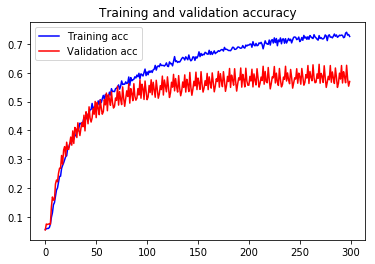

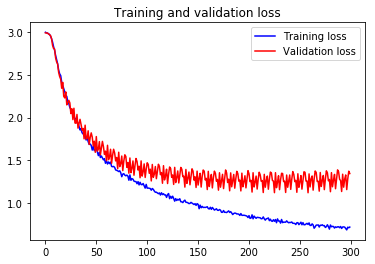

In [10]:
# loss and accuracy curves.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [11]:

from sklearn.metrics import confusion_matrix
import numpy as np

# img_width, img_height = 200, 200
# test_data_path = 'test/'

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path,
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# model_path = 'checkpointORCA_adam-10-0.13.h5'

# model = load_model(model_path)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# predictions[predictions<=0.5] = 0
# predictions[predictions>0.5] = 1

# predicted_classes = (predictions).astype(np.int)
# print(predictions)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)
# print(predicted_classes)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 600 images belonging to 20 classes.
              precision    recall  f1-score   support

          AB       0.27      0.20      0.23        30
        AB25       0.27      0.20      0.23        30
        AD11       0.83      1.00      0.91        30
        AD16       0.71      0.67      0.69        30
         AD5       0.71      0.50      0.59        30
         AD8       0.72      0.60      0.65        30
          AE       0.55      0.37      0.44        30
        AF22       0.43      0.50      0.46        30
         AF4       1.00      1.00      1.00        30
          AG       0.60      0.80      0.69        30
          AI       0.31      0.27      0.29        30
          AJ       0.23      0.27      0.25        30
        AJ14       0.91      1.00      0.95        30
          AK       0.33      0.30      0.32        30
         AK1       0.58      0.37      0.45        30
         AK2       0.49      0.87      0.63        30
          AS       0.97      1.00      